In [1]:
%matplotlib inline
import os
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Set environment variables for ROOT ---
conda_prefix = os.environ.get("CONDA_PREFIX")
os.environ["ROOT_INCLUDE_PATH"] = os.path.join(conda_prefix, "include")
os.environ["LD_LIBRARY_PATH"] = os.path.join(conda_prefix, "lib") + ":" + os.environ.get("LD_LIBRARY_PATH", "")

# --- Silence ROOT info/warning spam ---
ROOT.gErrorIgnoreLevel = ROOT.kFatal  # only show fatal errors
ROOT.gROOT.SetBatch(True)             # suppress GUI popups
ROOT.EnableImplicitMT()               # enable multithreading

# --- ATLAS style ---
atlas_style_dir = "/home/kalelc/research/atlasstyle/"
ROOT.gROOT.LoadMacro(os.path.join(atlas_style_dir, "AtlasStyle.C"))
ROOT.gROOT.LoadMacro(os.path.join(atlas_style_dir, "AtlasUtils.C"))
ROOT.gROOT.LoadMacro(os.path.join(atlas_style_dir, "AtlasLabels.C"))
ROOT.SetAtlasStyle()

# --- Load Delphes ---
delphes_dir = "/home/kalelc/research/Delphes-3.5.0/"
status = ROOT.gSystem.Load(os.path.join(delphes_dir, "libDelphes.so"))
if status != 0:
    raise RuntimeError("Error: Could not load libDelphes.so")
print("libDelphes.so loaded successfully ✅")

# --- Input ROOT file ---
fdir = os.path.join(delphes_dir, "displacedPhoton_data/calo_met_prompt_half_dark_events.root")


libDelphes.so loaded successfully ✅

Applying ATLAS style settings...



Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for ExRootAnalysis/ExRootTreeReader.h
   requested to autoload type ExRootTreeReader
Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for ExRootAnalysis/ExRootTreeWriter.h
   requested to autoload type ExRootTreeWriter
Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for ExRootAnalysis/ExRootTreeBranch.h
   requested to autoload type ExRootTreeBranch
Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for ExRootAnalysis/ExRootResult.h
   requested to autoload type ExRootResult
Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for ExRootAnalysis/ExRootClassifier.h
   requested to autoload type ExRootClassifier
Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for ExRootAnalysis/ExRootFilter.h
   requested to autoload type ExRootFil

In [2]:
# Create the RDataFrame
df = ROOT.RDataFrame("Delphes", fdir)

# Filter out events that have no photons to prevent errors
# df = df.Filter("Photon_size > 0", "Events with at least one photon")

df = df.AsNumpy([
    "Event.Number",
    "EFlowNeutralHadron_size", "EFlowNeutralHadron.ET", "EFlowNeutralHadron.Phi",
    "EFlowPhoton_size", "EFlowPhoton.ET", "EFlowPhoton.Phi",
    "EFlowTrack_size", "EFlowTrack.PT", "EFlowTrack.Phi",
    "Tower_size", "Tower.ET", "Tower.Eta", "Tower.Phi",
    "MissingET.MET", "MissingET.Phi",
    "GenMissingET.MET", "GenMissingET.Eta", "GenMissingET.Phi"
    ]) # Add all relevant Branches

df = pd.DataFrame({
    "event": [arr[0] for arr in df["Event.Number"]],
    "eflow_neutral_size": [arr for arr in df["EFlowNeutralHadron_size"]],
    "eflow_neutral_et": [arr for arr in df["EFlowNeutralHadron.ET"]],
    "eflow_neutral_phi": [arr for arr in df["EFlowNeutralHadron.Phi"]],
    "eflow_photon_size": [arr for arr in df["EFlowPhoton_size"]],
    "eflow_photon_et": [arr for arr in df["EFlowPhoton.ET"]],
    "eflow_photon_phi": [arr for arr in df["EFlowPhoton.Phi"]],
    "eflow_track_size": [arr for arr in df["EFlowTrack_size"]],
    "eflow_track_pt": [arr for arr in df["EFlowTrack.PT"]],
    "eflow_track_phi": [arr for arr in df["EFlowTrack.Phi"]],
    "tower_size": [arr for arr in df["Tower_size"]],
    "tower_et": [arr for arr in df["Tower.ET"]],
    "tower_eta": [arr for arr in df["Tower.Eta"]],
    "tower_phi": [arr for arr in df["Tower.Phi"]],
    "met": [arr[0] for arr in df["MissingET.MET"]],
    "met_phi": [arr[0] for arr in df["MissingET.Phi"]],
    "genmet": [arr[0] for arr in df["GenMissingET.MET"]],
    "genmet_eta": [arr[0] for arr in df["GenMissingET.Eta"]],
    "genmet_phi": [arr[0] for arr in df["GenMissingET.Phi"]],
})

# Sort the dataframe by the 'event' column and set it as the index
df = df.sort_values(by="event").set_index("event")

df.head()

,eflow_neutral_size,eflow_neutral_et,eflow_neutral_phi,eflow_photon_size,eflow_photon_et,eflow_photon_phi,eflow_track_size,eflow_track_pt,eflow_track_phi,tower_size,tower_et,tower_eta,tower_phi,met,met_phi,genmet,genmet_eta,genmet_phi
event,,,,,,,,,,,,,,,,,,
0,49,"[0.14759472012519836, 0.0951564684510231, 0.18...","[-2.4227778911590576, -0.18601009249687195, 0....",91,"[0.08115574717521667, 0.05840836465358734, 0.0...","[-2.7494759559631348, -0.3378962576389313, -2....",28,"[0.6048959493637085, 1.0212961435317993, 0.177...","[-2.008312940597534, 1.029970407485962, 1.6979...",144,"[0.08115574717521667, 0.05840836465358734, 0.0...","[-4.777219772338867, -4.619195461273193, -4.39...","[-2.7494759559631348, -0.3378962576389313, -2....",38.193195,-1.335756,39.143513,0.179296,-1.479393
1,51,"[0.11036365479230881, 0.225553959608078, 0.581...","[-2.361577272415161, 0.7110799551010132, 2.208...",89,"[0.07695319503545761, 0.0725039467215538, 0.06...","[-2.625077486038208, -0.2685551941394806, -2.0...",31,"[0.5914592146873474, 0.808401882648468, 0.2671...","[-1.2963365316390991, 1.029970407485962, -0.89...",145,"[0.07695319503545761, 0.0725039467215538, 0.06...","[-4.834770679473877, -4.565176963806152, -4.36...","[-2.625077486038208, -0.2685551941394806, -2.0...",21.571005,-2.194716,23.687180,1.921988,-1.932783
2,44,"[0.12501204013824463, 0.10507214069366455, 0.2...","[-2.1782853603363037, -0.08335831761360168, 0....",87,"[0.08130796998739243, 0.07218136638402939, 0.0...","[-2.7730820178985596, -0.29421037435531616, -1...",31,"[0.6531909108161926, 0.16605038940906525, 0.56...","[-2.008312940597534, -1.5072842836380005, 1.02...",137,"[0.08130796998739243, 0.07218136638402939, 0.0...","[-4.81563138961792, -4.605648994445801, -4.437...","[-2.7730820178985596, -0.29421037435531616, -1...",90.675583,-0.418172,95.386909,0.988994,-0.467594
3,46,"[0.27408555150032043, 0.19320613145828247, 0.6...","[-2.1836345195770264, 0.9028189778327942, 2.30...",90,"[0.07334253937005997, 0.07057955861091614, 0.0...","[-2.776808500289917, -0.21202325820922852, -2....",30,"[0.5563759207725525, 0.34888818860054016, 0.16...","[-2.008312940597534, -1.2963365316390991, -1.5...",140,"[0.07334253937005997, 0.07057955861091614, 0.0...","[-4.986375331878662, -4.551105976104736, -4.50...","[-2.776808500289917, -0.21202325820922852, -2....",82.190346,2.799991,78.944168,2.318977,2.877817
4,42,"[0.09584000706672668, 0.10614766925573349, 0.3...","[-2.3153064250946045, -0.2991108298301697, 0.9...",90,"[0.08473055064678192, 0.057260509580373764, 0....","[-2.682823657989502, -0.17707009613513947, -1....",32,"[0.48013854026794434, 0.7140259146690369, 0.12...","[-2.008312940597534, -1.2963365316390991, -1.5...",139,"[0.08473055064678192, 0.057260509580373764, 0....","[-4.9927978515625, -4.588396072387695, -4.4315...","[-2.682823657989502, -0.17707009613513947, -1....",15.463243,-0.173613,17.324291,3.902051,-0.014991


In [3]:
def calc_met(row):
    """Calculate the missing transverse energy (MET) and its azimuthal angle (Phi) from the given row of data.
    MET is actually the missing momentum energy, not missing energy.
    FIXME wrong

    Args:
        row (pd.Series): A row of the DataFrame containing jet and photon information.

    Returns:
        tuple[float, float]: A tuple containing the calculated MET and MET Phi.
    """

    towers = [ROOT.TLorentzVector() for _ in range(row["tower_size"])]
    eflow_neutrals = [ROOT.TLorentzVector() for _ in range(row["eflow_neutral_size"])]
    eflow_photons = [ROOT.TLorentzVector() for _ in range(row["eflow_photon_size"])]
    eflow_tracks = [ROOT.TLorentzVector() for _ in range(row["eflow_track_size"])]
    # for i in range(row["tower_size"]):
    #     towers[i].SetPtEtaPhiM(row["tower_et"][i], 0, row["tower_phi"][i], 0) # Set eta and mass to 0 -- performs identically to above line.
    for i in range(row["eflow_neutral_size"]):
        eflow_neutrals[i].SetPtEtaPhiM(row["eflow_neutral_et"][i], 0, row["eflow_neutral_phi"][i], 0)
    for i in range(row["eflow_photon_size"]):
        eflow_photons[i].SetPtEtaPhiM(row["eflow_photon_et"][i], 0, row["eflow_photon_phi"][i], 0)
    for i in range(row["eflow_track_size"]):
        eflow_tracks[i].SetPtEtaPhiM(row["eflow_track_pt"][i], 0, row["eflow_track_phi"][i], 0)
        
    met = ROOT.TLorentzVector()
    for efn in eflow_neutrals: # These for PF MET
        met -= efn
    for efp in eflow_photons:
        met -= efp
    for eft in eflow_tracks:
        met -= eft
    # for t in towers: # OLD -- Checked delphes_card_ATLAS.tcl, MET is calculated only from towers.
    #     met -= t

    return met.Pt(), met.Phi()

0.96349672

In [4]:
df[["pf_met", "pf_met_phi"]] = df.apply(calc_met, axis=1, result_type="expand")
print(f"calo_MET-pf_MET corr: \n{np.corrcoef(df['met'], df['pf_met'])}")
print(f"calo_MET-pf_MET_phi corr: \n{np.corrcoef(df['met_phi'], df['pf_met_phi'])}")
print(f"GenMET-pf_MET corr: \n{np.corrcoef(df['genmet'], df['pf_met'])}")
print(f"GenMET-MET corr: \n{np.corrcoef(df['genmet'], df['met'])}")
df.head()

calo_MET-pf_MET corr: 
[[1.         0.99106601]
 [0.99106601 1.        ]]
calo_MET-pf_MET_phi corr: 
[[1.         0.88470957]
 [0.88470957 1.        ]]
GenMET-pf_MET corr: 
[[1.         0.97268981]
 [0.97268981 1.        ]]
GenMET-MET corr: 
[[1.         0.96135386]
 [0.96135386 1.        ]]


,eflow_neutral_size,eflow_neutral_et,eflow_neutral_phi,eflow_photon_size,eflow_photon_et,eflow_photon_phi,eflow_track_size,eflow_track_pt,eflow_track_phi,tower_size,tower_et,tower_eta,tower_phi,met,met_phi,genmet,genmet_eta,genmet_phi,pf_met,pf_met_phi
event,,,,,,,,,,,,,,,,,,,,
0,49,"[0.14759472012519836, 0.0951564684510231, 0.18...","[-2.4227778911590576, -0.18601009249687195, 0....",91,"[0.08115574717521667, 0.05840836465358734, 0.0...","[-2.7494759559631348, -0.3378962576389313, -2....",28,"[0.6048959493637085, 1.0212961435317993, 0.177...","[-2.008312940597534, 1.029970407485962, 1.6979...",144,"[0.08115574717521667, 0.05840836465358734, 0.0...","[-4.777219772338867, -4.619195461273193, -4.39...","[-2.7494759559631348, -0.3378962576389313, -2....",38.193195,-1.335756,39.143513,0.179296,-1.479393,39.623859,-1.293316
1,51,"[0.11036365479230881, 0.225553959608078, 0.581...","[-2.361577272415161, 0.7110799551010132, 2.208...",89,"[0.07695319503545761, 0.0725039467215538, 0.06...","[-2.625077486038208, -0.2685551941394806, -2.0...",31,"[0.5914592146873474, 0.808401882648468, 0.2671...","[-1.2963365316390991, 1.029970407485962, -0.89...",145,"[0.07695319503545761, 0.0725039467215538, 0.06...","[-4.834770679473877, -4.565176963806152, -4.36...","[-2.625077486038208, -0.2685551941394806, -2.0...",21.571005,-2.194716,23.687180,1.921988,-1.932783,21.662282,-1.906551
2,44,"[0.12501204013824463, 0.10507214069366455, 0.2...","[-2.1782853603363037, -0.08335831761360168, 0....",87,"[0.08130796998739243, 0.07218136638402939, 0.0...","[-2.7730820178985596, -0.29421037435531616, -1...",31,"[0.6531909108161926, 0.16605038940906525, 0.56...","[-2.008312940597534, -1.5072842836380005, 1.02...",137,"[0.08130796998739243, 0.07218136638402939, 0.0...","[-4.81563138961792, -4.605648994445801, -4.437...","[-2.7730820178985596, -0.29421037435531616, -1...",90.675583,-0.418172,95.386909,0.988994,-0.467594,97.095654,-0.472339
3,46,"[0.27408555150032043, 0.19320613145828247, 0.6...","[-2.1836345195770264, 0.9028189778327942, 2.30...",90,"[0.07334253937005997, 0.07057955861091614, 0.0...","[-2.776808500289917, -0.21202325820922852, -2....",30,"[0.5563759207725525, 0.34888818860054016, 0.16...","[-2.008312940597534, -1.2963365316390991, -1.5...",140,"[0.07334253937005997, 0.07057955861091614, 0.0...","[-4.986375331878662, -4.551105976104736, -4.50...","[-2.776808500289917, -0.21202325820922852, -2....",82.190346,2.799991,78.944168,2.318977,2.877817,76.794416,2.879909
4,42,"[0.09584000706672668, 0.10614766925573349, 0.3...","[-2.3153064250946045, -0.2991108298301697, 0.9...",90,"[0.08473055064678192, 0.057260509580373764, 0....","[-2.682823657989502, -0.17707009613513947, -1....",32,"[0.48013854026794434, 0.7140259146690369, 0.12...","[-2.008312940597534, -1.2963365316390991, -1.5...",139,"[0.08473055064678192, 0.057260509580373764, 0....","[-4.9927978515625, -4.588396072387695, -4.4315...","[-2.682823657989502, -0.17707009613513947, -1....",15.463243,-0.173613,17.324291,3.902051,-0.014991,17.802801,-0.428569


(np.float64(0.31877954956058935), np.float64(0.8712130912796708))

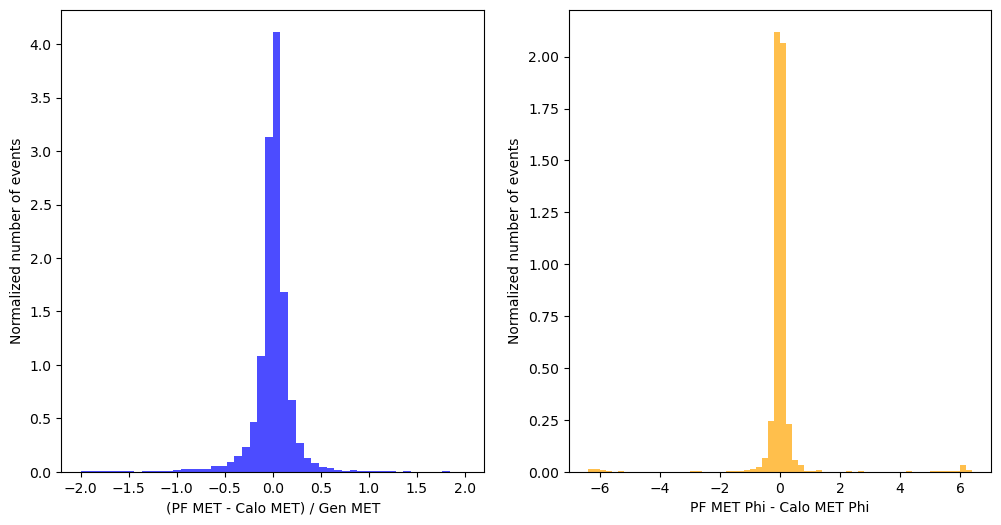

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist((df["pf_met"] - df["met"]) / df["genmet"], bins=50, range=(-2, 2), density=True, color='blue', alpha=0.7)
axes[0].set_xlabel("(PF MET - Calo MET) / Gen MET")
axes[0].set_ylabel("Normalized number of events")

axes[1].hist((df["pf_met_phi"] - df["met_phi"]), bins=64, density=True, range=(-6.4, 6.4), color='orange', alpha=0.7)
axes[1].set_xlabel("PF MET Phi - Calo MET Phi")
axes[1].set_ylabel("Normalized number of events")

np.std((df["pf_met"] - df["met"]) / df["genmet"]), np.std((df["pf_met_phi"] - df["met_phi"]))

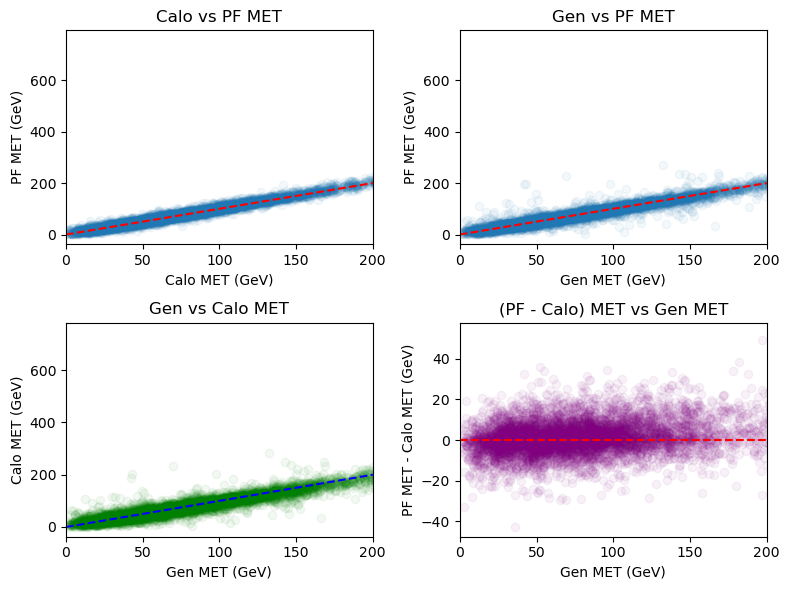

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
met_scatter_alpha = 0.05

# Plot 1: Calo MET vs PF MET
axes[0, 0].scatter(df["met"], df["pf_met"], alpha=met_scatter_alpha)
axes[0, 0].set_xlabel("Calo MET (GeV)")
axes[0, 0].set_ylabel("PF MET (GeV)")
axes[0, 0].set_title("Calo vs PF MET")
axes[0, 0].plot([0, 200], [0, 200], color='red', linestyle='--')  # y=x line
axes[0, 0].set_xlim(0, 200)

# Plot 2: PF MET vs Gen MET
axes[0, 1].scatter(df["genmet"], df["pf_met"], alpha=met_scatter_alpha)
axes[0, 1].set_xlabel("Gen MET (GeV)")
axes[0, 1].set_ylabel("PF MET (GeV)")
axes[0, 1].set_title("Gen vs PF MET")
axes[0, 1].plot([0, 200], [0, 200], color='red', linestyle='--')  # y=x line
axes[0, 1].set_xlim(0, 200)

# Plot 3: Calo MET vs Gen MET
axes[1, 0].scatter(df["genmet"], df["met"], alpha=met_scatter_alpha, color='green')
axes[1, 0].set_xlabel("Gen MET (GeV)")
axes[1, 0].set_ylabel("Calo MET (GeV)")
axes[1, 0].set_title("Gen vs Calo MET")
axes[1, 0].plot([0, 200], [0, 200], color='blue', linestyle='--')  # y=x line
axes[1, 0].set_xlim(0, 200)

# Plot 4: (Calc MET - Calo MET) vs Gen MET
axes[1, 1].scatter(df["genmet"], df["pf_met"] - df["met"], alpha=met_scatter_alpha, color='purple')
axes[1, 1].set_xlabel("Gen MET (GeV)")
axes[1, 1].set_ylabel("PF MET - Calo MET (GeV)")
axes[1, 1].set_title("(PF - Calo) MET vs Gen MET")
axes[1, 1].axhline(0, color='red', linestyle='--')  # y=0 line
axes[1, 1].set_xlim(0, 200)

plt.tight_layout()
plt.show()

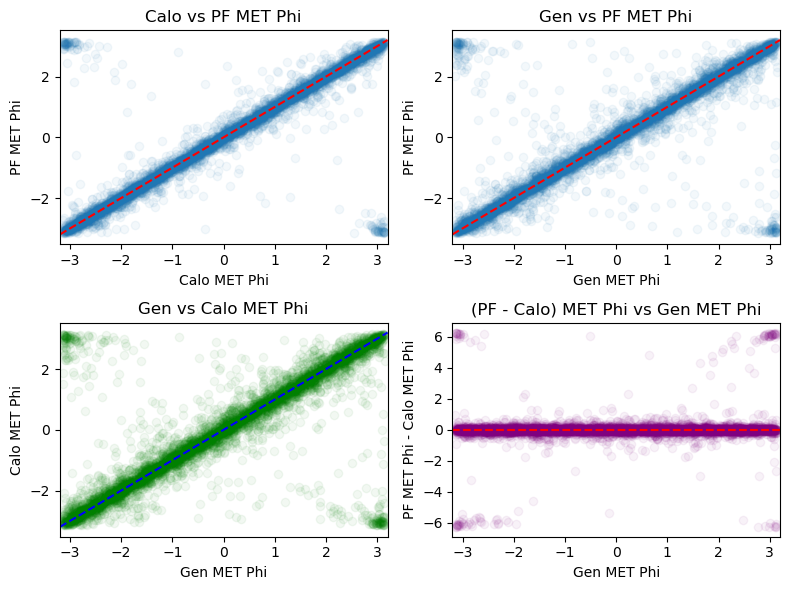

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
phi_scatter_alpha = 0.05

# Plot 1: Calo MET Phi vs PF MET Phi
axes[0, 0].scatter(df["met_phi"], df["pf_met_phi"], alpha=phi_scatter_alpha)
axes[0, 0].set_xlabel("Calo MET Phi")
axes[0, 0].set_ylabel("PF MET Phi")
axes[0, 0].set_title("Calo vs PF MET Phi")
axes[0, 0].plot([-3.2, 3.2], [-3.2, 3.2], color='red', linestyle='--')  # y=x line
axes[0, 0].set_xlim(-3.2, 3.2)

# Plot 2: PF MET Phi vs Gen MET Phi
axes[0, 1].scatter(df["genmet_phi"], df["pf_met_phi"], alpha=phi_scatter_alpha)
axes[0, 1].set_xlabel("Gen MET Phi")
axes[0, 1].set_ylabel("PF MET Phi")
axes[0, 1].set_title("Gen vs PF MET Phi")
axes[0, 1].plot([-3.2, 3.2], [-3.2, 3.2], color='red', linestyle='--')  # y=x line
axes[0, 1].set_xlim(-3.2, 3.2)

# Plot 3: Calo MET Phi vs Gen MET Phi
axes[1, 0].scatter(df["genmet_phi"], df["met_phi"], alpha=phi_scatter_alpha, color='green')
axes[1, 0].set_xlabel("Gen MET Phi")
axes[1, 0].set_ylabel("Calo MET Phi")
axes[1, 0].set_title("Gen vs Calo MET Phi")
axes[1, 0].plot([-3.2, 3.2], [-3.2, 3.2], color='blue', linestyle='--')  # y=x line
axes[1, 0].set_xlim(-3.2, 3.2)

# Plot 4: (PF MET Phi - Calo MET Phi) vs Gen MET Phi
axes[1, 1].scatter(df["genmet_phi"], df["pf_met_phi"] - df["met_phi"], alpha=phi_scatter_alpha, color='purple')
axes[1, 1].set_xlabel("Gen MET Phi")
axes[1, 1].set_ylabel("PF MET Phi - Calo MET Phi")
axes[1, 1].set_title("(PF - Calo) MET Phi vs Gen MET Phi")
axes[1, 1].axhline(0, color='red', linestyle='--')  # y=0 line
axes[1, 1].set_xlim(-3.2, 3.2)

plt.tight_layout()
plt.show()

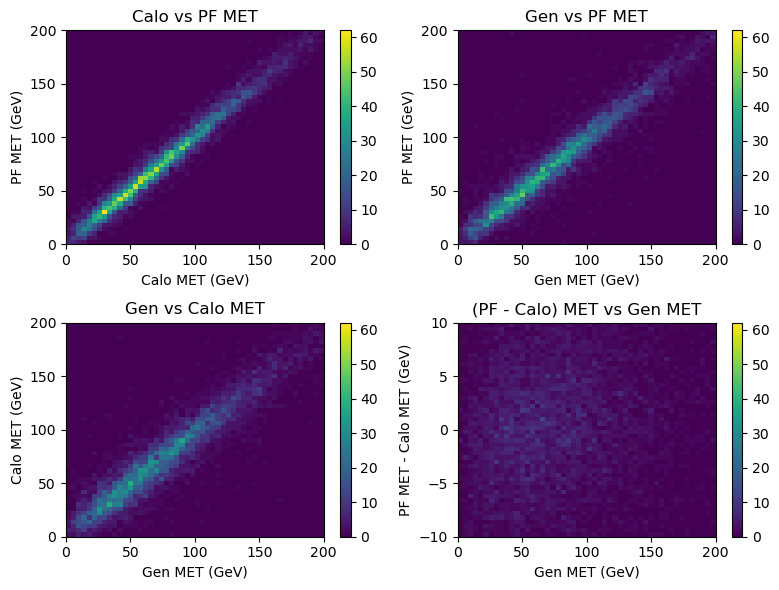

In [8]:
from matplotlib.colors import Normalize

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
met_hist_bins = 50  # Number of bins for the 2D histograms
met_hist_range = [[0, 200], [0, 200]]
met_cmap = "viridis"

# Plot 1: Calo MET vs PF MET
h1 = axes[0, 0].hist2d(df["met"], df["pf_met"], bins=met_hist_bins, range=met_hist_range, cmap=met_cmap)
axes[0, 0].set_xlabel("Calo MET (GeV)")
axes[0, 0].set_ylabel("PF MET (GeV)")
axes[0, 0].set_title("Calo vs PF MET")
fig.colorbar(h1[3], ax=axes[0, 0])

# Plot 2: PF MET vs Gen MET
h2 = axes[0, 1].hist2d(df["genmet"], df["pf_met"], bins=met_hist_bins, range=met_hist_range, cmap=met_cmap)
axes[0, 1].set_xlabel("Gen MET (GeV)")
axes[0, 1].set_ylabel("PF MET (GeV)")
axes[0, 1].set_title("Gen vs PF MET")
fig.colorbar(h2[3], ax=axes[0, 1])

# Plot 3: Calo MET vs Gen MET
h3 = axes[1, 0].hist2d(df["genmet"], df["met"], bins=met_hist_bins, range=met_hist_range, cmap=met_cmap)
axes[1, 0].set_xlabel("Gen MET (GeV)")
axes[1, 0].set_ylabel("Calo MET (GeV)")
axes[1, 0].set_title("Gen vs Calo MET")
fig.colorbar(h3[3], ax=axes[1, 0])

# Plot 4: (PF MET - Calo MET) vs Gen MET
h4 = axes[1, 1].hist2d(df["genmet"], df["pf_met"] - df["met"], bins=met_hist_bins, range=[[0, 200], [-10, 10]], cmap=met_cmap)
axes[1, 1].set_xlabel("Gen MET (GeV)")
axes[1, 1].set_ylabel("PF MET - Calo MET (GeV)")
axes[1, 1].set_title("(PF - Calo) MET vs Gen MET")
fig.colorbar(h4[3], ax=axes[1, 1])

# Normalize the colorbar across all plots
norm = Normalize(vmin=0, vmax=max(h1[0].max(), h2[0].max(), h3[0].max(), h4[0].max()))
h1[3].set_norm(norm)
h2[3].set_norm(norm)
h3[3].set_norm(norm)
h4[3].set_norm(norm)

plt.tight_layout()
plt.savefig("met_plots/pf_calo_met.png")
plt.show()


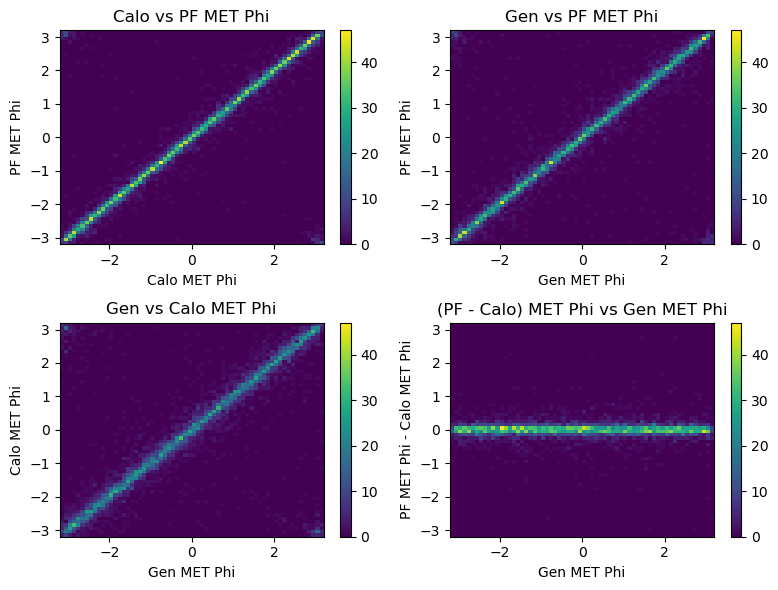

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
phi_hist_bins = 64 # Number of bins for the 2D histograms
phi_hist_range = [[-3.2, 3.2], [-3.2, 3.2]]  # Adjusted range for phi values
phi_cmap = "viridis"

# Plot 1: Calo MET Phi vs PF MET Phi
h1 = axes[0, 0].hist2d(df["met_phi"], df["pf_met_phi"], bins=phi_hist_bins, range=phi_hist_range, cmap=phi_cmap)
axes[0, 0].set_xlabel("Calo MET Phi")
axes[0, 0].set_ylabel("PF MET Phi")
axes[0, 0].set_title("Calo vs PF MET Phi")
fig.colorbar(h1[3], ax=axes[0, 0])

# Plot 2: PF MET Phi vs Gen MET Phi
h2 = axes[0, 1].hist2d(df["genmet_phi"], df["pf_met_phi"], bins=phi_hist_bins, range=phi_hist_range, cmap=phi_cmap)
axes[0, 1].set_xlabel("Gen MET Phi")
axes[0, 1].set_ylabel("PF MET Phi")
axes[0, 1].set_title("Gen vs PF MET Phi")
fig.colorbar(h2[3], ax=axes[0, 1])

# Plot 3: Calo MET Phi vs Gen MET Phi
h3 = axes[1, 0].hist2d(df["genmet_phi"], df["met_phi"], bins=phi_hist_bins, range=phi_hist_range, cmap=phi_cmap)
axes[1, 0].set_xlabel("Gen MET Phi")
axes[1, 0].set_ylabel("Calo MET Phi")
axes[1, 0].set_title("Gen vs Calo MET Phi")
fig.colorbar(h3[3], ax=axes[1, 0])

# Plot 4: (PF MET Phi - Calo MET Phi) vs Gen MET Phi
h4 = axes[1, 1].hist2d(df["genmet_phi"], df["pf_met_phi"] - df["met_phi"], bins=phi_hist_bins, range=phi_hist_range, cmap=phi_cmap)
axes[1, 1].set_xlabel("Gen MET Phi")
axes[1, 1].set_ylabel("PF MET Phi - Calo MET Phi")
axes[1, 1].set_title("(PF - Calo) MET Phi vs Gen MET Phi")
fig.colorbar(h4[3], ax=axes[1, 1])

# Normalize the colorbar across all plots
norm = Normalize(vmin=0, vmax=max(h1[0].max(), h2[0].max(), h3[0].max(), h4[0].max()))
h1[3].set_norm(norm)
h2[3].set_norm(norm)
h3[3].set_norm(norm)
h4[3].set_norm(norm)

plt.tight_layout()
plt.savefig("met_plots/pf_calo_met_phi.png")
plt.show()
